#BHARGAV SONAGARA
##TASK-2:
###From the given ‘Iris’ dataset, predict the optimum number of clusters and ###represent it visually
##K-Means:
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

Dataset link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Importing all the necessary Libraries

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

#Data Gathering

In [444]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [445]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [446]:
df.shape

(150, 6)

In [447]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [448]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [450]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [451]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [452]:
df.drop(columns=['Id'], axis='columns', inplace=True) # droping a unecessary column ID

In [453]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data Visualization

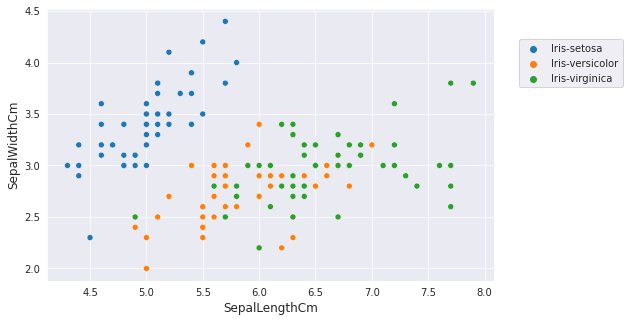

In [454]:
# Here we see how data is distributed
fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.xlabel("SepalLengthCm" ,size=12)
plt.ylabel("SepalWidthCm" ,size=12)
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.8))
plt.show()

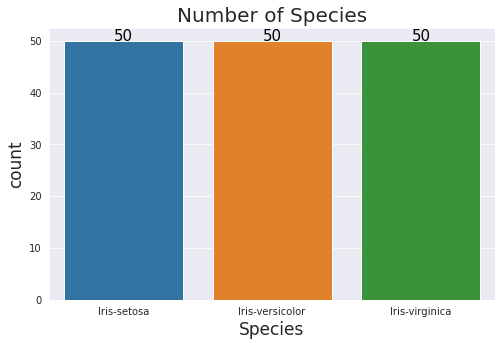

In [455]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x = "Species", data = df)
ax.set_title("Number of Species", fontsize = 20)
plt.xlabel("Species",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), color='black', size=15, ha="center")

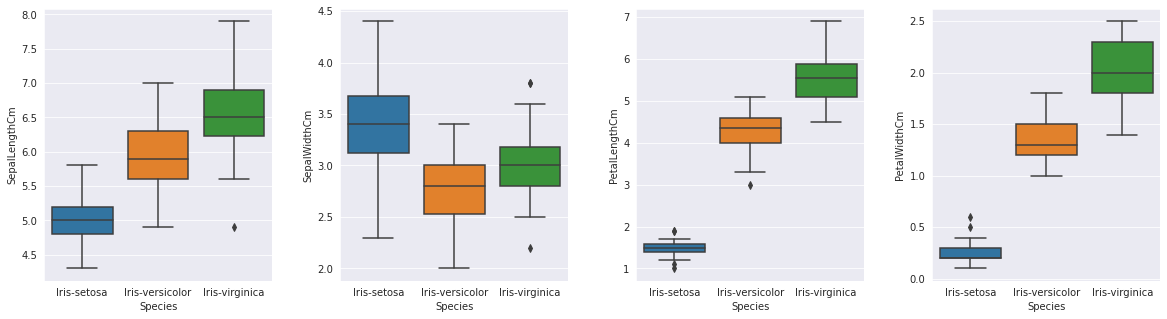

In [456]:
num_col = [	'SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']
cat_col = ['Species']
fig, axes = plt.subplots(1,4, figsize=(20,5))
for idx,cat_col in enumerate(cat_col):
  for idx1, num_col in enumerate(num_col):
    sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[idx1])
plt.subplots_adjust(wspace=0.3)

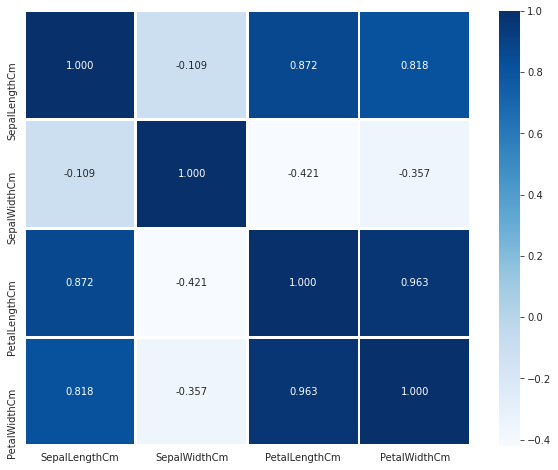

In [457]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Blues', linewidths=2)
plt.show()

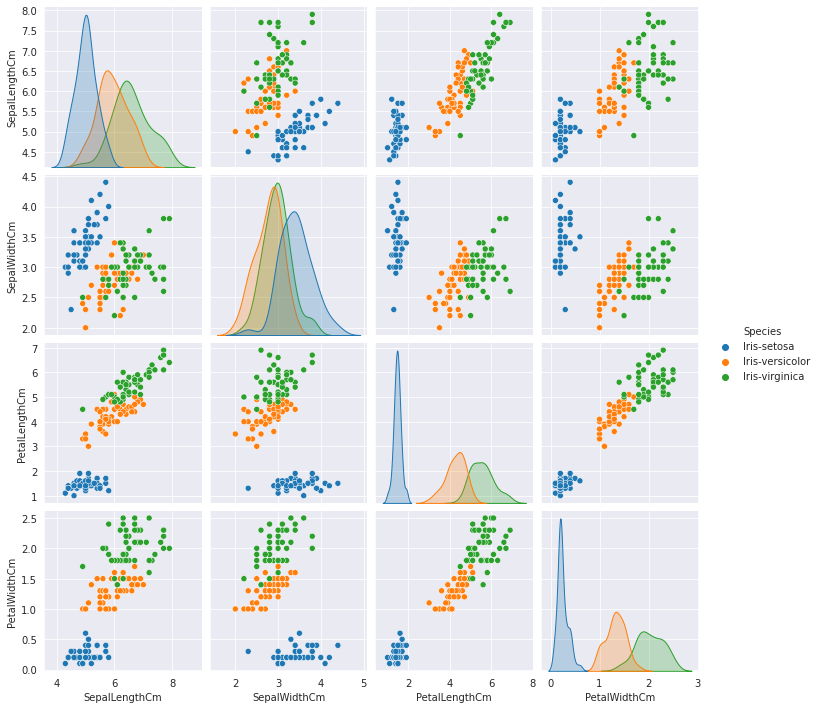

In [458]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='Species')
plt.show()

#Feature Engineering

In [459]:
#We are checking their is any outlier or not
df1 = df.drop(columns=['Species'], axis='columns')
import scipy.stats as stats
z = abs(stats.zscore(df1))
df1 = df[(z<3).all(axis=1)]

In [460]:
df.shape

(150, 5)

In [461]:
df1.shape

(149, 5)

In [462]:
df1['Species'] = df['Species']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [463]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#Splitting of Training and Testing Data

In [504]:
x = df1.drop(columns=['Species'], axis='columns')
y = df1['Species']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=5)

#Feature Importance

In [465]:
#we are checking which feature is more important
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
model = et.fit(x,y)

In [466]:
model.feature_importances_

array([0.10324198, 0.05397102, 0.3817953 , 0.4609917 ])

In [467]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)

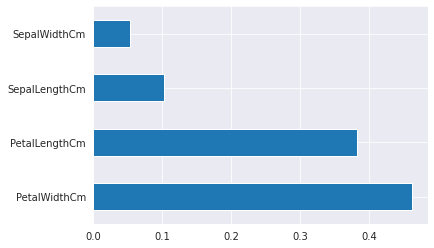

In [468]:
feat_imp.nlargest(n=4).plot(kind='barh')
plt.show()

#Elbow Method

In [469]:
#Using Elbow method we are checking the optimal number of Cluster
from sklearn.cluster import KMeans

wcss = []

cluster_range = range(1,11)
for k in cluster_range:
  km = KMeans(n_clusters=k)
  km.fit(x)
  inertia = km.inertia_
  wcss.append(inertia)

wcss

[673.2018791946309,
 150.759145519429,
 77.43921693635009,
 55.816248724489796,
 45.03395756148613,
 38.16016532887402,
 33.55428400222966,
 29.305250821451626,
 27.322403635012332,
 25.99870336306206]

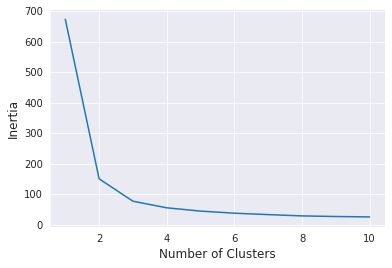

In [470]:
sns.lineplot(x=cluster_range, y=wcss)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Inertia", size=12)
plt.show()

#Apply KMeans Method

In [505]:
km = KMeans(n_clusters=3) #we are taking 3 cluster
model = km.fit(x)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [506]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [4.99183673, 3.39795918, 1.46326531, 0.24081633],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [507]:
cluster_centers = pd.DataFrame(data=model.cluster_centers_, columns=x.columns)

In [508]:
cluster_centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.901613,2.748387,4.393548,1.433871
1,4.991837,3.397959,1.463265,0.240816
2,6.850000,3.073684,5.742105,2.071053


In [509]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [510]:
model.labels_.shape

(149,)

In [511]:
ypred = model.predict(x)

In [512]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [513]:
x['cluster'] = ypred

In [514]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [515]:
x.cluster.replace(to_replace=[1, 0], value=[0, 1], inplace=True)

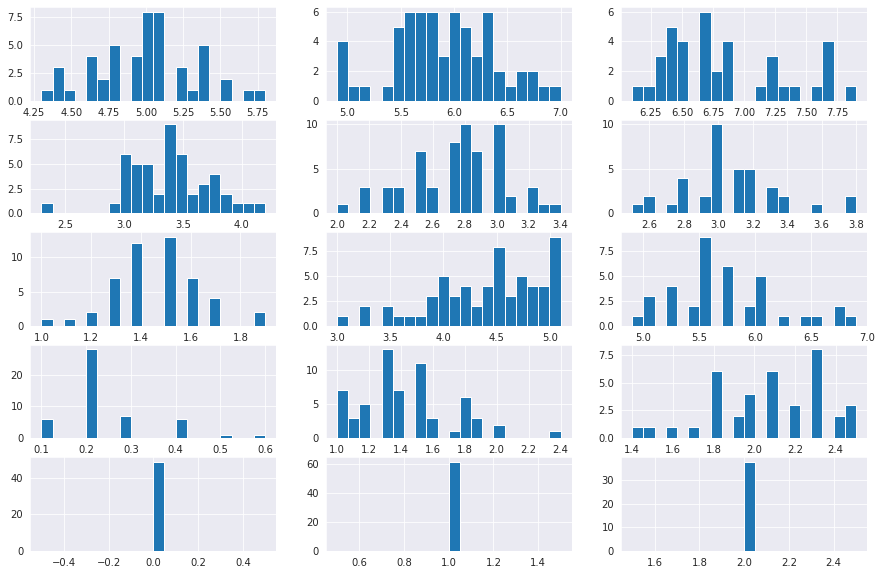

In [516]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))
for idx, i in enumerate(x.columns):
  for j in range(3):
    cluster = x[x['cluster'] == j]
    cluster[i].hist(bins=20, ax=axes[idx, j])  

#how the balance frequency is distributed for 3 clusters

In [517]:
#using Label Encoder we encode our data into numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Testing Accuracy

In [518]:
ypred = x['cluster']

In [519]:
np.array(ypred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [520]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

print(f"Accuracy Score: {round(accuracy_score(y, ypred)*100,2)}%\n")
print(f"F1 Score: {round(f1_score(y, ypred, pos_label='positive', average='weighted')*100,2)}%\n")
print(f"Confusion Matrix:\n {confusion_matrix(y, ypred)}\n")
print(f"Validation Mean Score: {round(((cross_val_score(km, x,y, scoring='accuracy')).mean())*100,2)}%\n")
print(f"Validation Mean Score: {round(((cross_val_score(km, x,y, scoring='f1_macro')).mean())*100,2)}%\n")

Accuracy Score: 89.26%

F1 Score: 89.1%

Confusion Matrix:
 [[49  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Validation Mean Score: 37.79%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Validation Mean Score: 18.01%



#Principal Component Analysis for Visualize the Results

In [521]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)
principal_components = pc.fit_transform(x)

In [522]:
#Here we are taking only 2 parameter for visualize the data
pca_df = pd.DataFrame(data = principal_components, columns= ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-2.852584,0.351747
1,-2.884891,-0.140943
2,-3.048629,-0.110606
3,-2.914546,-0.286110
4,-2.894169,0.357604
...,...,...
144,2.178317,0.188043
145,1.444435,-0.379109
146,2.008077,0.081850
147,2.138795,0.108024


In [523]:
my_model = km.fit(pca_df)
my_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [524]:
my_model.cluster_centers_

array([[-2.817495  ,  0.19126643],
       [ 2.58366701,  0.25948466],
       [ 0.64319208, -0.31020116]])

In [525]:
pca_df['cluster'] = model.predict(pca_df)

In [526]:
pca_df['cluster'] = le.inverse_transform(pca_df['cluster'])

In [527]:
cluster_centers = pd.DataFrame(data= my_model.cluster_centers_, columns = ['pca1', 'pca2'])
cluster_centers

,pca1,pca2
0,-2.817495,0.191266
1,2.583667,0.259485
2,0.643192,-0.310201


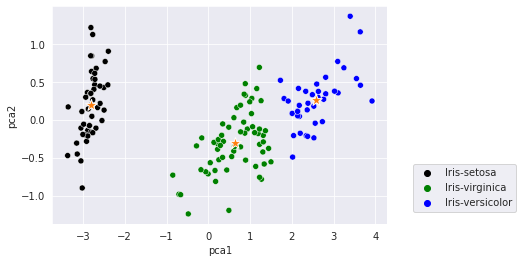

In [528]:
sns.scatterplot(x='pca1', y='pca2', data=pca_df, hue=pca_df['cluster'], palette=['black', 'green', 'blue'])
sns.scatterplot(x='pca1', y='pca2', data=cluster_centers, marker='*', s=150)
plt.legend(bbox_to_anchor=[1.4, .3])
plt.show()